In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
edges = []
nodes_in_network = set()
chosen_ego = 549089429

PATH = 'twitter/549089429.edges'
with open(PATH, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 2:
            node1, node2 = parts
            edges.append((node1, node2))
            nodes_in_network.add(node1)
            nodes_in_network.add(node2)

# Create directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

G.add_node(chosen_ego)

# Connect ego to all other nodes (ego follows everyone)
for node in nodes_in_network:
    G.add_edge(chosen_ego, node)


degree_cent = nx.degree_centrality(G)
betweenness_cent = nx.betweenness_centrality(G)
closeness_cent = nx.closeness_centrality(G)

#quick stats
print(f"\nNetwork stats:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Density: {nx.density(G):.4f}")
print(f"Average Degree: {sum(dict(G.degree()).values()) / G.number_of_nodes()}")
print(f"Average In-Degree: {sum(dict(G.in_degree()).values()) / G.number_of_nodes()}")
print(f"Average Out-Degree: {sum(dict(G.out_degree()).values()) / G.number_of_nodes()}")
print(f"avg_degree_centrality: {sum(degree_cent.values()) / len(degree_cent)}")
print(f"max_degree_centrality: {max(degree_cent.values())}")
print(f"avg_betweenness: {sum(betweenness_cent.values()) / len(betweenness_cent)}")
print(f"max_betweenness: {max(betweenness_cent.values())}")
print(f"avg_closeness: {sum(closeness_cent.values()) / len(closeness_cent)}")
print(f"max_closeness: {max(closeness_cent.values())}")



Network stats:
Number of nodes: 15
Number of edges: 139
Density: 0.6619
Average Degree: 18.533333333333335
Average In-Degree: 9.266666666666667
Average Out-Degree: 9.266666666666667
avg_degree_centrality: 1.3238095238095238
max_degree_centrality: 1.6428571428571428
avg_betweenness: 0.029304029304029304
max_betweenness: 0.08218864468864469
avg_closeness: 0.7364561403508773
max_closeness: 1.0


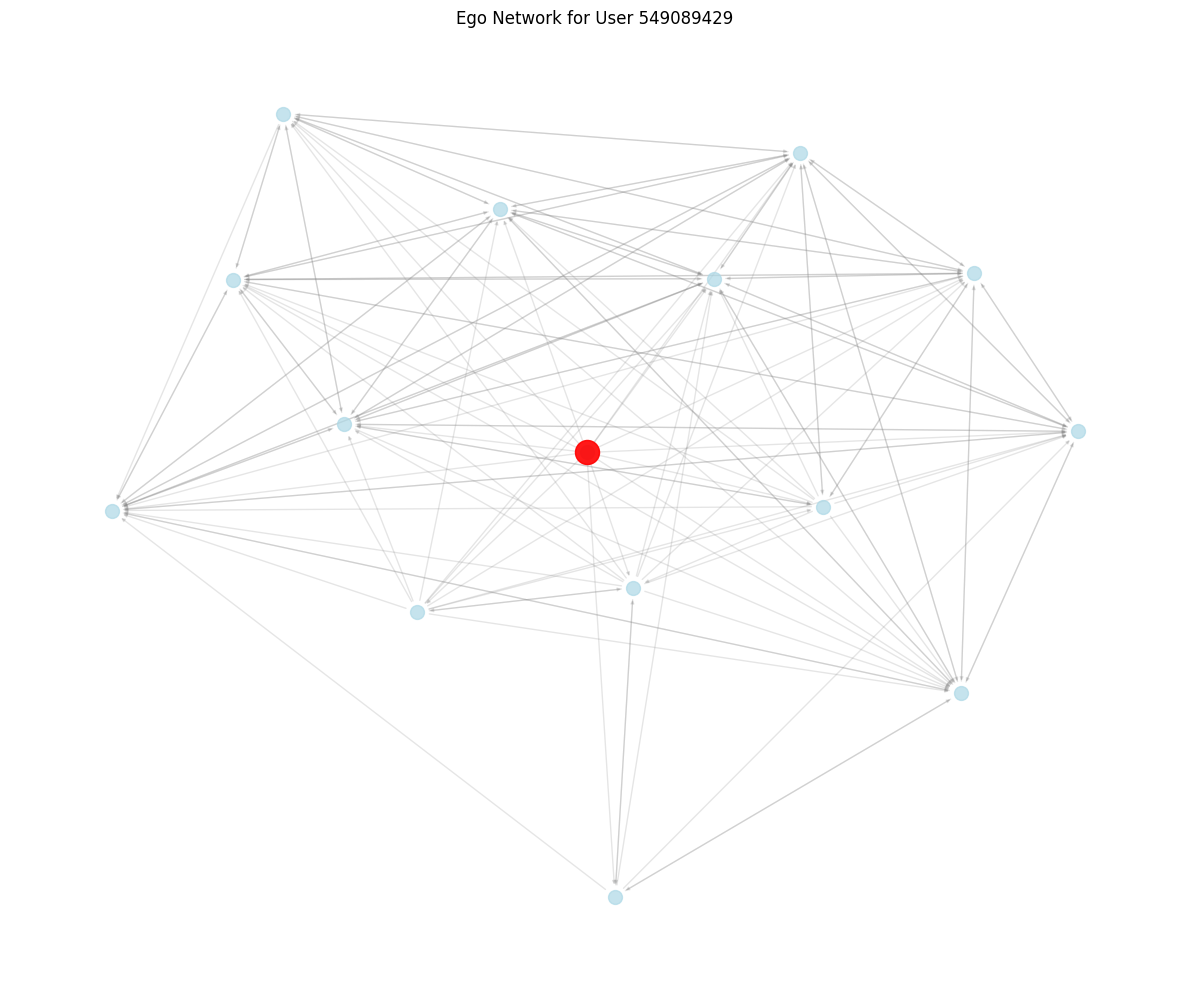

In [3]:
# Basic visualization
plt.figure(figsize=(12, 10))

# Use spring layout for positioning
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the network
nx.draw_networkx_nodes(G, pos,
                       node_color='lightblue',
                       node_size=100,
                       alpha=0.7)

# Highlight the ego node
nx.draw_networkx_nodes(G, pos,
                       nodelist=[chosen_ego],
                       node_color='red',
                       node_size=300,
                       alpha=0.9)

# Draw edges with low opacity so it's not too cluttered
nx.draw_networkx_edges(G, pos,
                       edge_color='gray',
                       alpha=0.2,
                       arrows=True,
                       arrowsize=5)

plt.title(f"Ego Network for User {chosen_ego}")
plt.axis('off')
plt.tight_layout()
#plt.savefig(f'ego_network_{chosen_ego}.png', dpi=150, bbox_inches='tight')
plt.show()

#print(f"Visualization saved as 'ego_network_{chosen_ego}.png'")